In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
#os dados estão separados por professores com diversas características, como sexo, raça, titulação, regime de trabalho, etc.
#outra parte é sobre o nivel de ensino, com informações sobre a instituição, como nome, sigla, localização, etc.


df = pd.read_csv('folder/MICRODADOS_ED_SUP_IES_2022.csv', sep=';', encoding=' ISO-8859-1', on_bad_lines='skip')
df

,NU_ANO_CENSO,NO_REGIAO_IES,CO_REGIAO_IES,NO_UF_IES,SG_UF_IES,CO_UF_IES,NO_MUNICIPIO_IES,CO_MUNICIPIO_IES,IN_CAPITAL_IES,NO_MESORREGIAO_IES,...,QT_DOC_EX_60_MAIS,QT_DOC_EX_BRANCA,QT_DOC_EX_PRETA,QT_DOC_EX_PARDA,QT_DOC_EX_AMARELA,QT_DOC_EX_INDIGENA,QT_DOC_EX_COR_ND,QT_DOC_EX_BRA,QT_DOC_EX_EST,QT_DOC_EX_COM_DEFICIENCIA
0,2022,Centro-Oeste,5,Mato Grosso,MT,51,Cuiabá,5103403,1,Centro-Sul Mato-grossense,...,183,1023,85,431,43,8,47,1609,28,6
1,2022,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,1,Distrito Federal,...,506,1848,94,474,59,9,402,2731,155,17
2,2022,Nordeste,2,Sergipe,SE,28,São Cristóvão,2806701,0,Leste Sergipano,...,196,206,31,266,13,2,1231,1719,30,1
3,2022,Norte,1,Amazonas,AM,13,Manaus,1302603,1,Centro Amazonense,...,200,110,12,141,6,2,1447,1718,0,1
4,2022,Nordeste,2,Piauí,PI,22,Teresina,2211001,1,Centro-Norte Piauiense,...,239,133,44,232,1,2,1070,1482,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590,2022,Centro-Oeste,5,Goiás,GO,52,Goiânia,5208707,1,Centro Goiano,...,0,8,0,3,0,0,1,12,0,0
2591,2022,Sudeste,3,Minas Gerais,MG,31,Belo Horizonte,3106200,1,Metropolitana de Belo Horizonte,...,2,91,21,52,5,0,1,170,0,0
2592,2022,Nordeste,2,Alagoas,AL,27,Cacimbinhas,2701209,0,Agreste Alagoano,...,1,2,0,1,0,0,3,6,0,0
2593,2022,Sudeste,3,Rio de Janeiro,RJ,33,São Gonçalo,3304904,0,Metropolitana do Rio de Janeiro,...,0,2,0,2,0,0,0,4,0,0


In [3]:
#eliminando colunas de codigo
import re 
colunas_filtradas = filter(lambda x: re.search(r'CO_', x) == None, df.columns)
df = df[list(colunas_filtradas)]




SG_IES                          470
NU_CEP_IES                       39
NU_ANO_CENSO                      0
QT_DOC_EX_0_29                    0
QT_DOC_EX_PARC                    0
                               ... 
IN_ACESSO_PORTAL_CAPES            0
IN_ACESSO_OUTRAS_BASES            0
IN_ASSINA_OUTRA_BASE              0
IN_REPOSITORIO_INSTITUCIONAL      0
QT_DOC_EX_COM_DEFICIENCIA         0
Length: 69, dtype: int64

In [7]:
#vou dropar os valores na pois a porcentagem deles equivale a 0.015% do total de dados
df.dropna(inplace=True)


C:\Users\mathe\AppData\Local\Temp\ipykernel_11092\1253928197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [8]:
#sem valores nulos
df.isnull().sum().sort_values(ascending=True)


NU_ANO_CENSO                    0
IN_CATALOGO_ONLINE              0
QT_LIVRO_ELETRONICO             0
QT_DOC_TOTAL                    0
QT_DOC_EXE                      0
                               ..
QT_TEC_MEDIO_FEM                0
QT_TEC_FUNDAMENTAL_COMP_MASC    0
QT_TEC_FUNDAMENTAL_COMP_FEM     0
QT_TEC_ESPECIALIZACAO_FEM       0
QT_DOC_EX_COM_DEFICIENCIA       0
Length: 69, dtype: int64

In [8]:
#agrupando as regios por quantidade de docentes
#isso retorna uma série, então eu transformo em um dataframe resetando o index
professores_por_regiao = df.groupby('NO_REGIAO_IES')['QT_DOC_EXE'].sum().sort_values(ascending=False)

professores_por_regiao = professores_por_regiao.reset_index()

fig = px.bar(professores_por_regiao, x='NO_REGIAO_IES', y='QT_DOC_EXE', title='Quantidade de docentes por região', color='NO_REGIAO_IES',width=800, height=600)
fig.layout.template = 'plotly_dark'
fig.layout.xaxis.title = 'Região'
fig.layout.yaxis.title = 'Docentes'
fig.layout.legend = dict(x=1, y=1)

fig.show()







In [9]:
#agrupando qt de professores total pelas 10 maiores instituições
professores_por_instituicao = df.groupby('SG_IES')['QT_DOC_TOTAL'].sum().sort_values(ascending=False).head(10)
professores_por_instituicao 

SG_IES
USP      5887
UFRJ     5253
UNIP     3879
UFF      3488
UFMG     3233
UFBA     3178
UFPE     3055
UNB      2977
UFRGS    2897
UNESP    2861
Name: QT_DOC_TOTAL, dtype: int64

In [10]:
#plotando o grafico de barras
fig = px.bar(professores_por_instituicao, x=professores_por_instituicao.index, y='QT_DOC_TOTAL', title='Quantidade de docentes por instituição', color='QT_DOC_TOTAL')
fig.layout.template = 'plotly_dark'
fig.layout.xaxis.title = 'Instituição'
fig.layout.yaxis.title = 'Docentes'
fig.layout.legend = dict(x=1, y=1, title='Docentes')
fig.show()

In [41]:
#agrupando por deficientes pelas 10 maiores instituições
deficientes_por_instituicao = df.groupby('SG_IES')['QT_DOC_EX_COM_DEFICIENCIA'].sum().sort_values(ascending=False).head(10)
deficientes_por_instituicao


SG_IES
UEL          50
UFPE         31
MACKENZIE    27
UFRJ         25
UNINOVE      23
UESPI        21
IFSP         20
UEM          19
UFU          17
UNB          17
Name: QT_DOC_EX_COM_DEFICIENCIA, dtype: int64

In [43]:
#plotando o grafico de barras
fig = px.bar(deficientes_por_instituicao, x=deficientes_por_instituicao.index, y='QT_DOC_EX_COM_DEFICIENCIA', title='Quantidade de docentes deficientes por instituição', color='QT_DOC_EX_COM_DEFICIENCIA')
fig.layout.template = 'plotly_dark'
fig.layout.xaxis.title = 'Instituição'
fig.layout.yaxis.title = 'Docentes deficientes'
fig.layout.legend = dict(x=1, y=1, title='Docentes deficientes')
fig.show()

In [16]:
#faculdades por regiao onde se tem acesso a topicos relacionados a internet 
regioes_faculdades_online = df.groupby('NO_REGIAO_IES')['IN_PARTICIPA_REDE_SOCIAL'].sum().sort_values(ascending=False)
regioes_faculdades_online = regioes_faculdades_online.reset_index()
regioes_faculdades_online

,NO_REGIAO_IES,IN_PARTICIPA_REDE_SOCIAL
0,Sudeste,570
1,Nordeste,386
2,Sul,227
3,Centro-Oeste,181
4,Norte,111


In [10]:
#agora agruparemos pelos outros indices de acesso a internet
colunas_filtradas_online_outros = [ 'IN_ACESSO_PORTAL_CAPES',
 'IN_ASSINA_OUTRA_BASE',
 'IN_REPOSITORIO_INSTITUCIONAL',
 'IN_BUSCA_INTEGRADA',
 'IN_CATALOGO_ONLINE']


regioes_faculdades_online_outros = df.groupby('NO_REGIAO_IES')[colunas_filtradas_online_outros].sum()
regioes_faculdades_online_outros = regioes_faculdades_online_outros.reset_index()
regioes_faculdades_online_outros = regioes_faculdades_online_outros.melt(id_vars='NO_REGIAO_IES', var_name='Acesso', value_name='Faculdades')

regioes_faculdades_online_outros['Acesso'] = regioes_faculdades_online_outros['Acesso'].str.replace('IN_', '').str.replace('_', ' ').str.title()

regioes_faculdades_online_outros




,NO_REGIAO_IES,Acesso,Faculdades
0,Centro-Oeste,Acesso Portal Capes,84
1,Nordeste,Acesso Portal Capes,168
2,Norte,Acesso Portal Capes,42
3,Sudeste,Acesso Portal Capes,330
4,Sul,Acesso Portal Capes,134
5,Centro-Oeste,Assina Outra Base,168
6,Nordeste,Assina Outra Base,340
7,Norte,Assina Outra Base,117
8,Sudeste,Assina Outra Base,580
9,Sul,Assina Outra Base,209


In [11]:
#plotando o grafico de barras
fig = px.bar(regioes_faculdades_online_outros, x='NO_REGIAO_IES', y='Faculdades', title='Faculdades por região com acesso a recursos relacionados a internet', color='Acesso', barmode='group')
fig.layout.template = 'plotly_dark'
fig.layout.xaxis.title = 'Região'
fig.layout.yaxis.title = 'Faculdades'
fig.layout.legend = dict(x=1, y=1, title='Faculdades')
fig.update_layout(width=1000, height=600)

In [12]:
#tecnica realizada para manipular o dataframe para que possa ser plotado o grafico
colunas_idades = ['QT_DOC_EX_0_29', 'QT_DOC_EX_30_34', 'QT_DOC_EX_35_39', 'QT_DOC_EX_40_44', 'QT_DOC_EX_45_49', 'QT_DOC_EX_50_54', 'QT_DOC_EX_55_59', 'QT_DOC_EX_60_MAIS']
idades = df[colunas_idades].sum()
idades = idades.reset_index()
idades.columns = ['Idade', 'Docentes']
idades['Idade'] = idades['Idade'].str.replace('QT_DOC_EX_', '').str.replace('_', '-').str.title()  
idades


,Idade,Docentes
0,0-29,9894
1,30-34,35487
2,35-39,54075
3,40-44,60298
4,45-49,49923
5,50-54,39414
6,55-59,34199
7,60-Mais,41159


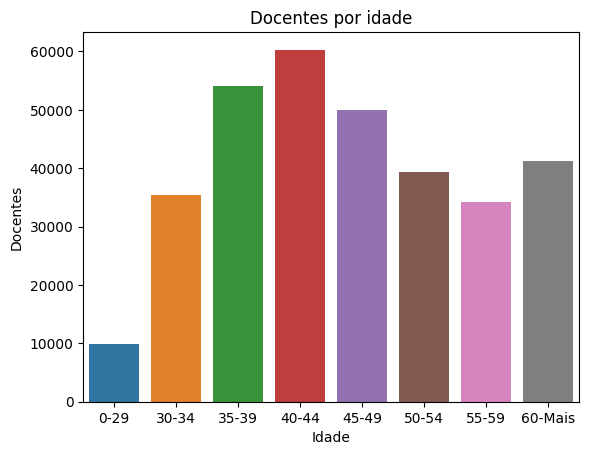

In [13]:
#plotando o histograma
sns.barplot(idades, x='Idade', y='Docentes', hue='Idade')
plt.title('Docentes por idade')
plt.xlabel('Idade')
plt.ylabel('Docentes')
plt.show()





In [76]:
#distribuicao de professores negros por regioes 
negros_por_regioes = df.groupby('NO_REGIAO_IES')['QT_DOC_EX_PRETA'].sum()
negros_por_regioes = negros_por_regioes.reset_index()
negros_por_regioes.columns = ['Nome da Região', 'Docentes Negros']
negros_por_regioes



,Nome da Região,Docentes Negros
0,Centro-Oeste,1045
1,Nordeste,2752
2,Norte,1028
3,Sudeste,2651
4,Sul,629


In [85]:
#plotando o grafico da distribuição 
fig = px.bar(negros_por_regioes, x='Nome da Região', y='Docentes Negros', color='Nome da Região')
fig.layout.template = 'plotly_dark'
fig.layout.xaxis.title = 'Região'
fig.layout.yaxis.title = 'Faculdades'
fig.layout.legend = dict(x=1, y=1, title='Faculdades')
fig.show()

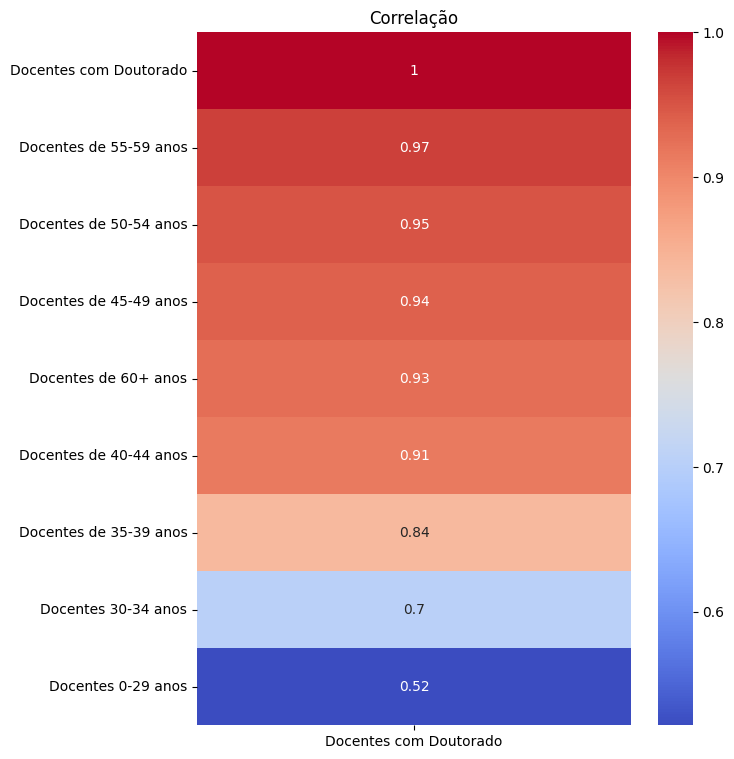

In [88]:
#colunas a serem utilizadas para a correlação
colunas_professores_idade = ['QT_DOC_EX_0_29', 'QT_DOC_EX_30_34', 'QT_DOC_EX_35_39', 'QT_DOC_EX_40_44', 'QT_DOC_EX_45_49', 'QT_DOC_EX_50_54', 'QT_DOC_EX_55_59', 'QT_DOC_EX_60_MAIS','QT_DOC_EX_DOUT']

# Calcular a correlação
correlacao = df[colunas_professores_idade].corr()

# Renomear as colunas
novas_colunas = ['Docentes 0-29 anos', 'Docentes 30-34 anos', 'Docentes de 35-39 anos', 'Docentes de 40-44 anos', 'Docentes de 45-49 anos', 'Docentes de 50-54 anos', 'Docentes de 55-59 anos', 'Docentes de 60+ anos', 'Docentes com Doutorado']
correlacao.index = novas_colunas

# Filtrar para obter apenas a correlação da coluna 'QT_DOC_EX_DOUT' com as outras
correlacao_dout = correlacao[['QT_DOC_EX_DOUT']]

# Renomear a coluna
correlacao_dout.columns = ['Docentes com Doutorado']

# Ordenar os valores
correlacao_dout = correlacao_dout.sort_values(by='Docentes com Doutorado', ascending=False)

# Criar um heatmap
plt.figure(figsize=(7, 9))  # Ajustar o tamanho da figura

# Criar o heatmap
sns.heatmap(correlacao_dout, annot=True, cmap='coolwarm')
plt.title('Correlação')
plt.show()







In [ ]:
df.info()